# Part-of-Speech tagging (textblob) - detection of parts of speech


To start off, Part-of-Speech Tagging has a lot of benefits as it allows us to categorize words from any given material more efficiently and quickly. The idea behind is that with this process, <b>parts of speech are assigned to words in a text/corpus</b>.


Therefore <b>Tagging</b> refers to the process of marking a word with a tag to further indicate their meaning (part-of-speech). Here, we use TextBlob for this, as it contains a library with an API that makes it possible to process textual data and do part-of-speech tagging. (part-of-speech tagging is just one of the several Natural Language Processing methods made available with TextBlob)

In TextBlob, every tag has its own acronym to define it and in general, TextBlob function like python strings. 

## Installing TextBlob


There are several ways to install TextBlob, most commonly you can install it from the PyPI or with conda:

In [ ]:
$ pip install -U textblob
$ python -m textblob.download_corpora


$ conda install -c conda-forge textblob
$ python -m textblob.download_corpora

# Detection of parts of speech in Python

## Intro

In [37]:
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt

After importing TextBlob, we can start making our own `TextBlob` object. With the tags property we can find out all parts of speech of the string we just created:

In [6]:
text = ('I knows what all words mean. Python does it all.')
first_textblob = TextBlob(text)
first_textblob.tags

[('I', 'PRP'),
 ('knows', 'VBP'),
 ('what', 'WP'),
 ('all', 'DT'),
 ('words', 'NNS'),
 ('mean', 'VBP'),
 ('Python', 'NN'),
 ('does', 'VBZ'),
 ('it', 'PRP'),
 ('all', 'DT')]

As you can see, it returns a list of tuples with the word and its tag in it. As the next examples show, you can also extract all the noun phrases from a text with the noun_phrases property or use tokenization to get an output of sentences and of words:


In [7]:
print('Noun phrases:', first_textblob.noun_phrases)

print('Sentences:', first_textblob.sentences)

print('Words:', first_textblob.words)


Noun phrases: ['python']
Sentences: [Sentence("I knows what all words mean."), Sentence("Python does it all.")]
Words: ['I', 'knows', 'what', 'all', 'words', 'mean', 'Python', 'does', 'it', 'all']


To work with bigger texts, we firstly open the file (here we use the ice_man.txt provided in the texts folder): 

In [2]:
with open('desktop/texts/ice_man.txt', encoding='utf-8') as fh:
    ice_man = fh.read()
print(ice_man)

I married the Ice Man.
I first met the Ice Man at this ski resort hotel. I guess that’s the kind of place one ought to meet an Ice Man. In the boisterous hotel lobby, crowded with young people, the Ice Man was sitting in a chair at the furthest possible remove from the fireplace, silently reading a book. Though it was approaching high noon, it seemed to me that the cool, fresh light of the winter morning still lingered around him. Hey, that’s the Ice Man, my friend informed me in a low voice. But at that time, I had no idea what in the world an Ice Man was. My friend didn’t really know, either. She just knew that he existed and was called the Ice Man. She’s sure he’s made out of ice. That’s why he’s called the Ice Man, she said to me with a serious expression. It was like she was talking about a ghost or somebody with a contagious disease or something.

The Ice Man was tall, and from looking at him, his hair seemed bristly. When I saw his face, he looked fairly young still, but that th

Then we can use the properties just like in the example before to get the same output:

In [9]:
textblob_iceman = TextBlob(ice_man)
print (textblob_iceman.tags)
print ('Sentences:', textblob_iceman.sentences)

[('I', 'PRP'), ('married', 'VBD'), ('the', 'DT'), ('Ice', 'NNP'), ('Man', 'NNP'), ('I', 'PRP'), ('first', 'RB'), ('met', 'VBD'), ('the', 'DT'), ('Ice', 'NNP'), ('Man', 'NN'), ('at', 'IN'), ('this', 'DT'), ('ski', 'JJ'), ('resort', 'NN'), ('hotel', 'NN'), ('I', 'PRP'), ('guess', 'VBP'), ('that', 'IN'), ('’', 'NNP'), ('s', 'VBD'), ('the', 'DT'), ('kind', 'NN'), ('of', 'IN'), ('place', 'NN'), ('one', 'CD'), ('ought', 'MD'), ('to', 'TO'), ('meet', 'VB'), ('an', 'DT'), ('Ice', 'NNP'), ('Man', 'NN'), ('In', 'IN'), ('the', 'DT'), ('boisterous', 'JJ'), ('hotel', 'NN'), ('lobby', 'NN'), ('crowded', 'VBN'), ('with', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('the', 'DT'), ('Ice', 'NNP'), ('Man', 'NNP'), ('was', 'VBD'), ('sitting', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('chair', 'NN'), ('at', 'IN'), ('the', 'DT'), ('furthest', 'JJS'), ('possible', 'JJ'), ('remove', 'NN'), ('from', 'IN'), ('the', 'DT'), ('fireplace', 'NN'), ('silently', 'RB'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('Thoug

# Counting the POS tags

In order for us to find out how many POS tags are present in the text above, we firstly create a dictionary, and then perform a loop to count each POS tag: 

In [53]:
count_tag_dict = {}
for word, tag in textblob_iceman.tags:
    if tag in count_tag_dict.keys():
        count_tag_dict[tag] += 1
    else:
        count_tag_dict[tag] = 1

print(count_tag_dict)

{'PRP': 529, 'VBD': 367, 'DT': 487, 'NNP': 206, 'RB': 406, 'NN': 684, 'IN': 522, 'JJ': 320, 'VBP': 173, 'CD': 11, 'MD': 49, 'TO': 117, 'VB': 169, 'VBN': 88, 'NNS': 156, 'VBG': 77, 'JJS': 3, 'PRP$': 134, 'CC': 145, 'WP': 18, 'VBZ': 87, 'WRB': 40, 'WDT': 12, 'EX': 27, 'RP': 24, 'UH': 3, 'RBR': 3, 'JJR': 11, 'PDT': 4, 'NNPS': 4}


After that, we can create a plotbar:

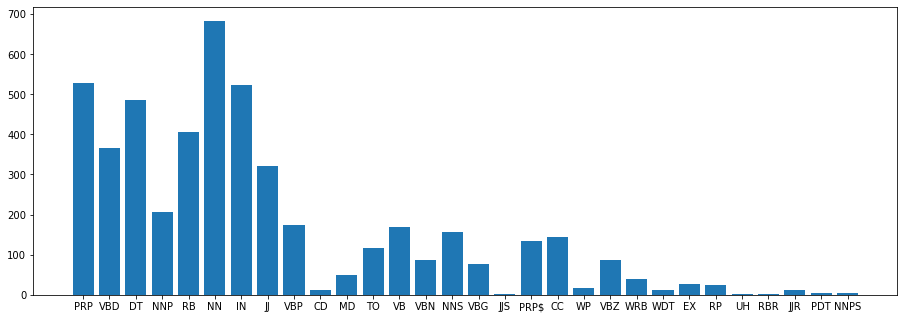

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(count_tag_dict.keys(), count_tag_dict.values())
plt.show()